In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [4]:
df_tabela_ligantes = pd.read_excel(os.path.join("data", 
                                                "df_tabela_ligantes.xlsx"))
df_tabela_ligantes

,Rótulo,Hora Início,Hora Fim,Número Médio Ligantes
0,1,18:15:00,18:30:00,2071
1,2,18:30:00,18:45:00,2002
2,3,18:45:00,19:00:00,1982
3,4,19:00:00,19:15:00,1835
4,5,19:15:00,19:30:00,1540
...,...,...,...,...
91,92,17:00:00,17:15:00,3143
92,93,17:15:00,17:30:00,3247
93,94,17:30:00,17:45:00,3009
94,95,17:45:00,18:00:00,2747


In [5]:
df_duracoes = pd.read_excel(os.path.join("data", "df_duracoes.xlsx"))
df_duracoes

,Duração Conexão,Número Ligantes,Percentagem Relativa,Percentagem Acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


In [6]:
# encontrando os coeficientes de ajuste polinomial para a tabela de durações
coefs = \
    metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "Percentagem Acumulada"],
                                saidas=df_duracoes.loc[:, "Duração Conexão"],
                                g=5)
coefs

array([ 7.25285079e+02, -1.67791097e+03,  1.41326154e+03, -5.23808658e+02,
        1.01010563e+02, -2.06253859e-01])

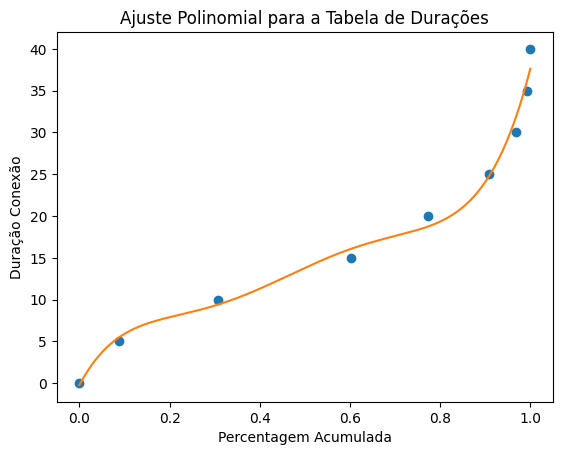

In [7]:
# gera 1000 valores de zero à um
x = np.linspace(0, 1, 1000)
# usa o polinômio ajustado para gerar os valores de y para cada valor
# dentro da coleção 'x'
y = np.polyval(coefs, x)

# pega todas as linhas da coluna "Percentagem Acumulada" e "Duração Conexão"
percentagens_acumuladas = df_duracoes.loc[:, "Percentagem Acumulada"]
duracoes = df_duracoes.loc[:, "Duração Conexão"]

# faz os pontos do gráfico
plt.plot(percentagens_acumuladas, duracoes, "o")

# faz o gráfico do ajuste polinomial
plt.plot(x, y)

# configura titulos e labels e mostra o gráfico
plt.xlabel("Percentagem Acumulada")
plt.ylabel("Duração Conexão")
plt.title("Ajuste Polinomial para a Tabela de Durações")
plt.show()

In [8]:
# usando os coeficientes do polinomio para encontrar o functus associado a 0
np.polyval(coefs, 0)

-0.20625385893845305

In [9]:
# função 'abs' tira o módulo do número resultante
abs(np.polyval(coefs, 0))

0.20625385893845305

In [10]:
# tempo máximo de duração
np.polyval(coefs, 1)

37.63129851329677

In [11]:
# primeira linha da tabela de ligantes
df_tabela_ligantes.iloc[0]

Rótulo                          1
Hora Início              18:15:00
Hora Fim                 18:30:00
Número Médio Ligantes        2071
Name: 0, dtype: object

In [12]:
# qtd de ligantes para a primeira linha da tabela de ligantes
qtd_ligantes = df_tabela_ligantes.iloc[0]["Número Médio Ligantes"]
qtd_ligantes

2071

In [13]:
# gerando as ligações (no domínio de 0 a 900) para a primeira linha da tabela de 
# ligantes
momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
momentos_ligacoes

array([172, 558, 343, ..., 425,  88, 334])

In [14]:
# ordenando as ligações para executar o algoritmo nan
momentos_ligacoes.sort()
momentos_ligacoes

array([  0,   0,   1, ..., 898, 899, 899])

### 0: a ``PRIMEIRA`` ligação da lista ocorreu no momento ``0``
### 2: a ``SEGUNDA`` ligação da lista ocorreu no momento ``2``
### 2: a ``TERCEIRA`` ligação da lista ocorreu no momento ``2``

In [15]:
# foi escolhida a estrutura de lista de dicionários para 
# representar os atendentes, sendo
# que cada atendente será representado por um dicionário com 
# as seguintes chaves:

# {
#     "inicio_atendimento": momento em que o atendente começa atendimento,
#     "fim_atendimento": momento em que o atendente termina atendimento,
# }

# inicializando a lista de atendentes vazia para começar a simulação
atendentes: list[dict] = []

In [16]:
# percorrendo, manualmente os momentos das ligações
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [17]:
# gera um aleatório (entre 0 e 1) para gerar o tempo de duração da ligação
np.random.seed(0)
aleatorio = np.random.rand()
aleatorio

0.5488135039273248

In [18]:
# tempo de duração da ligação
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

14.96515486746906

In [19]:
# se não houver atendentes, cria um novo atendente e adiciona 
# na lista de atendentes
if atendentes == []:

    # criando um atendente
    atendente = {
        "inicio_atendimento": momento_ligacao,
        "fim_atendimento": momento_ligacao + tempo_duracao,
    }

    # adicionando o atendente na lista de atendentes
    atendentes.append(atendente)

atendentes

[{'inicio_atendimento': 0, 'fim_atendimento': 14.96515486746906}]

### Vai para a ``próxima ligação``

In [20]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

0

In [21]:
# gera um aleatório (entre 0 e 1) para gerar o tempo de duração da ligação
# foi usado outro 'seed' para gerar outro aleatório
np.random.seed(1)
aleatorio = np.random.rand()
aleatorio

0.417022004702574

In [22]:
# tempo de duração da ligação
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611909601192

In [23]:
# se já houver atendente(s) na lista, 
for atendente in atendentes:

    # checando se o atendente está ocupado
    ocupado = atendente["fim_atendimento"] > momento_ligacao + 10

    if not ocupado:
        # se o atendente não estiver ocupado, atualiza o atendente com a nova ligação

        if momento_ligacao > atendente["fim_atendimento"]:
            atendente["inicio_atendimento"] = momento_ligacao
            atendente["fim_atendimento"] = momento_ligacao + tempo_duracao
        else:
            atendente["inicio_atendimento"] = atendente["fim_atendimento"]
            atendente["fim_atendimento"] = atendente["fim_atendimento"] + tempo_duracao
        
        break
else:
    # esse bloco é executado apenas se o loop for concluído SEM executar o break.
    # Ou seja, se todos os atendentes estiverem ocupados, cria um novo atendente
    atendente = {
        "inicio_atendimento": momento_ligacao,
        "fim_atendimento": momento_ligacao + tempo_duracao,
    }

    # adicionando o atendente na lista de atendentes
    atendentes.append(atendente)

atendentes

[{'inicio_atendimento': 0, 'fim_atendimento': 14.96515486746906},
 {'inicio_atendimento': 0, 'fim_atendimento': 11.718611909601192}]

### Fechando o código inteiro numa célula apenas

In [24]:
# Resolvendo o algoritmo usando apenas objetos nativos (sem usar a classe Atendente)
# Foi escolhido o objeto 'dicionário' para representar cada atendente. observe:

atendentes: list[dict] = []

# para cada ligação
for momento_ligacao in momentos_ligacoes:

    # np.random.rand() gera um número aleatório entre 0 e 1
    aleatorio = np.random.rand()

    # gerando a duração da ligação. Como a função polinomial retorna valores negativos,
    # usamos a função 'abs' para garantir que o valor seja positivo
    duracao = abs(np.polyval(coefs, aleatorio))

    # para cada atendente, checar se ele estará ocupado no momento da ligação + tempo 
    # máximo de espera. Se não estiver, ele atende a ligação
    # se todos estiverem ocupados, criar um novo atendente

    if atendentes == []:
        # se não houver atendentes, cria um novo atendente
        novo_atendente = {"inicio_atendimento": momento_ligacao, 
                          "fim_atendimento": momento_ligacao + duracao}
        
        # adicionando o atendente na lista de atendentes
        atendentes.append(novo_atendente)
        continue
    
    # se já houver atendentes na lista, deve-se percorrer cada atendente e checar se algum 
    # deles estará disponível no momento da ligação + 10 segundos
    for atendente in atendentes:

        # checando se o atendente está ocupado daqui a 10 segundos do momento da ligação
        # ocupado = atendente.checar_ocupado(momento_ligacao + 10)
        ocupado = atendente["fim_atendimento"] > momento_ligacao + 10

        if not ocupado:
            # se o atendente não estiver ocupado, ele atende a ligação
            # atendente.atender_ligacao_futura(duracao)
            atendente["inicio_atendimento"] = atendente["fim_atendimento"]
            atendente["fim_atendimento"] = atendente["inicio_atendimento"] + duracao
            break
    else:
        # entra aqui apenas se nunca ocorrer o break (ou seja, se todos os atendentes 
        # estiverem ocupados)

        # criando um novo atendente
        # novo_atendende = Atendente(inicio_atendimento=momento_ligacao, 
        #                            fim_atendimento=momento_ligacao + duracao)
        novo_atendende = {"inicio_atendimento": momento_ligacao, 
                          "fim_atendimento": momento_ligacao + duracao}
        atendentes.append(novo_atendende)

len(atendentes)

44

In [25]:
# conjunto de nan para cada periodo do dia (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
coluna_nan = []

# para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
for i, linha in df_tabela_ligantes.iterrows():

    # pega a qtd_ligantes para cada periodo do dia
    qtd_ligantes = linha["Número Médio Ligantes"]

    # gera aleatoriamente os momentos de ligação para cada periodo do dia
    momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
    # ordena os momentos de ligação para executar o algoritmo nan
    momentos_ligacoes.sort()
    
    # cria uma lista de atendentes necessários para atender as ligações para cada periodo do dia
    atendentes: list[dict] = []

    # para cada ligação
    for momento_ligacao in momentos_ligacoes:
        
        # gerando a duração da ligação
        aleatorio = np.random.rand()

        # gerando a duração da ligação
        duracao = abs(np.polyval(coefs, aleatorio))

        if atendentes == []:
            # se não houver atendentes, cria um novo atendente
            novo_atendente = {"inicio_atendimento": momento_ligacao, 
                              "fim_atendimento": momento_ligacao + duracao}
            
            # adicionando o atendente na lista de atendentes
            atendentes.append(novo_atendente)
            continue

        # para cada atendente, checar se ele estará ocupado no momento da ligação + tempo máximo 
        # de espera. Se não estiver, ele atende a ligação
        # se todos estiverem ocupados, criar um novo atendente
        for atendente in atendentes:

            # checando se o atendente está ocupado daqui a 10 segundos do momento da ligação
            # ocupado = atendente.checar_ocupado(momento_ligacao + 10)
            ocupado = atendente["fim_atendimento"] > momento_ligacao + 10

            if not ocupado:
                # se o atendente não estiver ocupado, ele atende a ligação
                # atendente.atender_ligacao_futura(duracao)
                atendente["inicio_atendimento"] = atendente["fim_atendimento"]
                atendente["fim_atendimento"] = atendente["inicio_atendimento"] + duracao
                break
        else:
            # entra aqui apenas se nunca ocorrer o break (ou seja, se todos os atendentes 
            # estiverem ocupados)

            # criando um novo atendente
            # novo_atendende = Atendente(inicio_atendimento=momento_ligacao, 
            #                            fim_atendimento=momento_ligacao + duracao)
            novo_atendende = {"inicio_atendimento": momento_ligacao, 
                            "fim_atendimento": momento_ligacao + duracao}
            atendentes.append(novo_atendende)


    # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
    # quantidade de atendentes criados para atender todas as ligações com 10 segundos 
    # de tempo máximo de espera    
    nan = len(atendentes)
    
    # antes de partir para a simulação do próximo período do dia, adicionar o resultado
    # na coleção de nan para cada período do dia
    coluna_nan.append(nan)

In [26]:
# checando o nan resultante para cada periodo (96 períodos) do dia
print(coluna_nan)
print(len(coluna_nan))

[46, 36, 39, 32, 30, 25, 30, 27, 25, 31, 25, 23, 21, 22, 21, 19, 19, 16, 17, 20, 12, 13, 12, 11, 5, 6, 4, 3, 2, 4, 3, 3, 3, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 4, 4, 13, 11, 14, 14, 28, 28, 30, 28, 49, 42, 45, 48, 60, 54, 60, 56, 52, 56, 50, 61, 41, 43, 51, 42, 44, 58, 52, 62, 48, 51, 51, 45, 49, 50, 55, 53, 55, 60, 50, 54, 56, 57, 56, 50, 43]
96


In [27]:
# checando a tabela de ligantes antes de adicionar a coluna de nan
df_tabela_ligantes

,Rótulo,Hora Início,Hora Fim,Número Médio Ligantes
0,1,18:15:00,18:30:00,2071
1,2,18:30:00,18:45:00,2002
2,3,18:45:00,19:00:00,1982
3,4,19:00:00,19:15:00,1835
4,5,19:15:00,19:30:00,1540
...,...,...,...,...
91,92,17:00:00,17:15:00,3143
92,93,17:15:00,17:30:00,3247
93,94,17:30:00,17:45:00,3009
94,95,17:45:00,18:00:00,2747


In [28]:
# adicionando a coluna de nan na tabela de ligantes
df_tabela_ligantes.loc[:, "NAN"] = coluna_nan
df_tabela_ligantes

,Rótulo,Hora Início,Hora Fim,Número Médio Ligantes,NAN
0,1,18:15:00,18:30:00,2071,46
1,2,18:30:00,18:45:00,2002,36
2,3,18:45:00,19:00:00,1982,39
3,4,19:00:00,19:15:00,1835,32
4,5,19:15:00,19:30:00,1540,30
...,...,...,...,...,...
91,92,17:00:00,17:15:00,3143,56
92,93,17:15:00,17:30:00,3247,57
93,94,17:30:00,17:45:00,3009,56
94,95,17:45:00,18:00:00,2747,50


In [29]:
def gerar_tabela_nan(df_tabela_ligantes: pd.DataFrame,
                        df_duracoes: pd.DataFrame,
                        tempo_maximo_espera: float = 10,
                        g: int = 5) -> list:

    """
    Função para gerar a lista de NANs para cada período do dia

    Args:
        df_tabela_ligantes (pd.DataFrame): DataFrame com a quantidade de ligantes. 
        (obrigatório)
        df_duracoes (pd.DataFrame): DataFrame com as durações das ligações. (obrigatório)
        tempo_maximo_espera (float): Tempo máximo de espera (opcional, default=10)
        g (int): Grau do polinômio de ajuste (opcional, default=5)
    Returns:
        pd.DataFrame: DataFrame com a quantidade de NANs
    """

    coefs = metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "Percentagem Acumulada"],
                                     saidas=df_duracoes.loc[:, "Duração Conexão"],
                                     g=g)


    # conjunto de nan para cada periodo do dia (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
    coluna_nan = []

    # para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
    for i, linha in df_tabela_ligantes.iterrows():

        # pega a qtd_ligantes para cada periodo do dia
        qtd_ligantes = linha["Número Médio Ligantes"]

        # gera aleatoriamente os momentos de ligação para cada periodo do dia
        momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
        # ordena os momentos de ligação para executar o algoritmo nan
        momentos_ligacoes.sort()
        
        # cria uma lista de atendentes necessários para atender as ligações para cada periodo do dia
        atendentes: list[dict] = []

        # para cada ligação
        for momento_ligacao in momentos_ligacoes:
            
            # gerando a duração da ligação
            aleatorio = np.random.rand()

            # gerando a duração da ligação
            duracao = abs(np.polyval(coefs, aleatorio))

            if atendentes == []:
                # se não houver atendentes, cria um novo atendente
                novo_atendente = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                
                # adicionando o atendente na lista de atendentes
                atendentes.append(novo_atendente)
                continue

            # para cada atendente, checar se ele estará ocupado no momento da ligação + tempo máximo 
            # de espera. Se não estiver, ele atende a ligação
            # se todos estiverem ocupados, criar um novo atendente
            for atendente in atendentes:

                # checando se o atendente está ocupado daqui a 10 segundos do momento da ligação
                # ocupado = atendente.checar_ocupado(momento_ligacao + 10)
                ocupado = atendente["fim_atendimento"] > momento_ligacao + tempo_maximo_espera

                if not ocupado:
                    # se o atendente não estiver ocupado, ele atende a ligação
                    # atendente.atender_ligacao_futura(duracao)
                    atendente["inicio_atendimento"] = atendente["fim_atendimento"]
                    atendente["fim_atendimento"] = atendente["inicio_atendimento"] + duracao
                    break
            else:
                # entra aqui apenas se nunca ocorrer o break (ou seja, se todos os atendentes 
                # estiverem ocupados)

                # criando um novo atendente
                # novo_atendende = Atendente(inicio_atendimento=momento_ligacao, 
                #                            fim_atendimento=momento_ligacao + duracao)
                novo_atendende = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                atendentes.append(novo_atendende)


        # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
        # quantidade de atendentes criados para atender todas as ligações com 10 segundos 
        # de tempo máximo de espera    
        nan = len(atendentes)
        
        # antes de partir para a simulação do próximo período do dia, adicionar o resultado
        # na coleção de nan para cada período do dia
        coluna_nan.append(nan)
    
    return coluna_nan

In [30]:
# chamando a função para gerar a tabela de nan
nan = gerar_tabela_nan(df_tabela_ligantes=df_tabela_ligantes,
                       df_duracoes=df_duracoes,
                       tempo_maximo_espera=10,
                       g=5)

In [31]:
# testando o nan para cada período do dia
print(nan)

[34, 36, 35, 38, 31, 30, 25, 27, 26, 27, 28, 25, 21, 20, 18, 24, 16, 18, 17, 21, 11, 13, 13, 14, 4, 4, 5, 4, 3, 3, 5, 5, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 3, 4, 3, 12, 18, 15, 14, 31, 30, 32, 30, 46, 48, 50, 50, 65, 56, 56, 61, 49, 51, 57, 47, 45, 48, 49, 44, 44, 49, 48, 51, 47, 53, 48, 47, 52, 52, 56, 54, 49, 50, 60, 57, 57, 57, 54, 53, 38]
